In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df_tot = pd.read_csv('/content/drive/MyDrive/MayoProject1VoxCeleb/rawTrain_1.csv')
display(df_tot)
print(df_tot.keys())

,Unnamed: 0,ID,Participant,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,age,gender
0,0,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,27.943003,0.124328,24.812248,26.861307,31.699125,6.886877,85.718100,...,0.047353,4.020101,3.645834,0.151429,0.079898,0.088750,0.064311,-33.909990,68.0,m
1,1,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,26.467838,0.072899,24.903242,26.110186,28.646020,3.742779,171.762620,...,0.048154,6.030151,3.626943,0.197143,0.088756,0.070000,0.036968,-35.213783,68.0,m
2,2,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,27.489487,0.048744,26.296910,27.341871,28.358173,2.061264,242.362470,...,0.032970,3.517588,3.125000,0.138333,0.076685,0.161667,0.229885,-34.446760,68.0,m
3,3,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,26.608780,0.127619,24.208565,25.634075,30.679205,6.470640,91.653160,...,0.051809,7.035176,4.663213,0.112222,0.058267,0.082222,0.036751,-34.757946,68.0,m
4,4,0a01d6b7-465d-4c03-9362-9945629122b2,id01206,27.170237,0.127571,23.402758,27.096771,30.115894,6.713137,22.753971,...,0.062265,4.020101,2.590674,0.150000,0.104307,0.216000,0.129089,-33.650030,68.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12765,12765,d87c94cc-34e5-4752-b44f-8d2c7e475f42,id08356,29.890106,0.022680,29.231920,29.938593,30.394740,1.162819,39.143170,...,0.122549,4.020101,2.590674,0.292000,0.246284,0.095000,0.047170,-28.599495,31.0,f
12766,12766,d87c94cc-34e5-4752-b44f-8d2c7e475f42,id08356,30.021532,0.088315,29.047306,29.451270,30.352144,1.304838,120.608580,...,0.131618,6.030151,4.639175,0.097778,0.048023,0.095556,0.071819,-29.762573,31.0,f
12767,12767,d93b8667-95fc-470e-a467-3a5a13d87923,id04720,21.358158,0.034950,20.694593,21.378864,22.103210,1.408617,37.805107,...,0.113570,3.517588,3.108808,0.193333,0.079092,0.132000,0.143861,-29.687563,29.0,m
12768,12768,d93b8667-95fc-470e-a467-3a5a13d87923,id04720,22.622227,0.267770,21.104310,21.436493,21.865860,0.761551,20.698824,...,0.142255,4.522613,3.608248,0.161429,0.133676,0.095714,0.079437,-28.477493,29.0,m


Index(['Unnamed: 0', 'ID', 'Participant', 'F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
    

In [40]:
df_tot = df_tot.dropna()


X = df_tot[['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']]

y_age = df_tot[['age']]
y_gender = df_tot[['gender']]


In [41]:
splitting = {}
for index, row in df_tot.iterrows():
  if row['ID'] in splitting:
    splitting[row['ID']].append(row)
  else:
    splitting[row['ID']] = []
    splitting[row['ID']].append(row)

In [42]:
len(splitting)

3527

In [47]:
import random
split_value = 0.8
split_ind = int(len(splitting) * split_value)
print(split_ind)
test_tot = set()
train_tot = set()
for i in range(split_ind):
  id, row = random.choice(list(splitting.items()))
  splitting.pop(id, None)
  train_tot.add(id)
for i in splitting:
  id, row = random.choice(list(splitting.items()))
  test_tot.add(id)

564


In [48]:
print(train_tot)
print(test_tot)
print(len(train_tot))
print(len(test_tot))

{'e8428b25-dcd3-4b22-b450-7c316d060199', 'b1a8a3d0-efee-4d5f-9d57-0b3371c4adb7', '9419ab83-acf9-4c3c-9ce3-a8d73684b324', '03bd5286-6549-4211-9667-f1b673ead3ff', '8cce11da-42e0-42bb-ad8f-c1710b456d62', '0a05147d-63d4-4cf6-bd80-d269b0b696dd', '098af983-aa7c-45be-92e2-b0264d5d68e5', '16ec1f37-bb20-4725-8601-25c5e5eb809c', '7ac19bfa-f3de-45e2-adc7-540a845858cf', 'c64d4493-bff2-432a-b0ed-330d3e9e9409', '0e581670-f38c-40b0-a1e2-f74fcbc7682b', '565ecf82-c379-42be-b198-7d2de1b18a8d', 'e288a33a-581b-4c94-90ce-842732b4f13f', '2accee26-d7d7-4235-a5af-58b4d5fbd434', 'f7249ec4-5b85-4b5a-96b1-676f674d0713', '7590d317-9a22-4445-a246-eaef45368d8f', '66d51486-3c08-45d9-aa51-97d4415abdc3', '80ddb43d-ebb4-4dea-9a8e-b2c948599d31', 'd1430e21-f8af-41bb-b980-9f3306423522', 'cb00f8f4-f9b6-4b14-9073-bd23468abf3b', 'd7892163-c559-4f2d-b401-8782193ab0f7', '2a1cd512-1017-4a1b-aa8d-592435be7aeb', 'fe3e0ab6-8d3c-45ac-9c14-7fb5e063d1f3', 'b93a563a-380b-43fc-ba71-346022fdbb0b', '1a1a446f-11f7-4457-87c4-ce662f95081f',

In [49]:
X_train = df_tot
X_test = df_tot
for num, row in df_tot.iterrows():
  if row['ID'] in train_tot:
    X_test = X_test[X_test.ID != row['ID']]
  elif row['ID'] in test_tot:
    X_train = X_train[X_train.ID != row['ID']]

In [50]:
print(len(X_train), len(X_test), len(df_tot))

12385 10707 12770


In [51]:
y_train_age = X_train[['age']]
y_train_gender = X_train[['gender']]
y_test_age = X_test[['age']]
y_test_gender = X_test[['gender']]

X_train = X_train[['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']]
X_test = X_test[['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']]

In [52]:
# split_index = int(len(df_tot) * 0.8)
# print(split_index)

# X_train = df_tot.iloc[:split_index]
# X_test = df_tot.iloc[split_index:]
# y_train_age = y_age.iloc[:split_index]
# y_test_age = y_age.iloc[split_index:]
# y_train_gender = y_gender.iloc[:split_index]
# y_test_gender = y_gender.iloc[split_index:]

# columns_to_drop = ['ID', 'Participant', "age", "gender"]
# X_train = X_train.drop(columns=columns_to_drop)
# X_test = X_test.drop(columns=columns_to_drop)
# X_train = X_train.loc[:, ~X_train.columns.str.contains('^Unnamed')]
# X_test = X_test.loc[:, ~X_test.columns.str.contains('^Unnamed')]

In [53]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train_age, y_test_age = train_test_split(X, y_age, test_size=0.2)
# X_train, X_test, y_train_gender, y_test_gender = train_test_split(X, y_gender, test_size=0.2)

In [54]:
y_test_gender

,gender
10,m
11,m
12,m
13,m
14,m
...,...
12765,f
12766,f
12767,m
12768,m


In [55]:
# Make above code split based on participant, not utterances

In [56]:
scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# convert m and f to 0 and 1 respectively --> m = 0 and f = 1
y_train_gender.loc[y_train_gender['gender']=='m', 'gender'] = 0
y_train_gender.loc[y_train_gender['gender']=='f', 'gender'] = 1
print(list(y_train_gender['gender']))

y_test_gender.loc[y_test_gender['gender']=='m', 'gender'] = 0
y_test_gender.loc[y_test_gender['gender']=='f', 'gender'] = 1
print(list(y_test_gender['gender']))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 

Linear Regression to Predict Age

In [58]:
from sklearn.linear_model import LinearRegression

model_age = LinearRegression()
model_age.fit(X_train, y_train_age)
# ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)
# y = age, and x1, x2, x3 = x variables in order that they were listed in X variable

# this gives β1, β2, ..., βk
print(model_age.coef_)
# this gives β0
print(model_age.intercept_)

[[-6.66530226e+00  5.51375284e-01  9.51887251e+05  3.71792184e+00
  -1.03923586e+06  5.35972404e+05 -6.69401888e-01  5.02340158e-01
  -5.28994639e-01  6.30038328e-02 -1.40619084e+01  3.45796712e+00
   1.04962281e+05  6.70775168e+00 -2.25854306e+05  1.50561531e+05
  -1.13769269e+00 -4.59208644e-01 -5.85850345e-01 -5.22102570e-01
  -1.48236651e+00  1.28750113e+00 -1.26202484e+00 -2.20291655e-02
  -4.10898756e+00 -9.07850136e-02  3.65732265e+00  8.47592748e-02
  -2.59487458e-01 -4.93252365e-02  1.08611367e+00 -7.14251810e-01
   4.70307465e-01  2.11501563e-01  1.07581142e+00  5.29945363e-02
   2.49208584e-01 -1.82049394e-01  1.27664205e+00  2.03496918e-02
  -1.58630735e-01  3.21283922e-01 -1.15748946e+00  5.36518452e-01
   3.02404129e+00  3.32557461e-01  5.83764205e-01 -2.99390553e-01
   3.89326829e-02 -1.22081577e-02 -2.33471198e+00 -2.70568343e+00
  -3.43097885e-01  6.19722126e-01  4.46938209e-01 -2.30217339e-01
   1.27826527e+00  3.91266582e+00 -6.94014533e-01 -1.59365885e-01
   5.10964

In [59]:
true_age = []
for i in y_test_age["age"]:
  true_age.append(i)
print(true_age)

[31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 35.0, 35.0, 31.0, 31.0, 31.0, 31.0, 69.0, 69.0, 29.0, 29.0, 43.0, 43.0, 43.0, 43.0, 32.0, 32.0, 51.0, 51.0, 55.0, 55.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 46.0, 46.0, 46.0, 29.0, 29.0, 29.0, 29.0, 29.0, 65.0, 65.0, 23.0, 23.0, 39.0, 39.0, 35.0, 35.0, 35.0, 35.0, 35.0, 31.0, 31.0, 31.0, 31.0, 31.0, 43.0, 43.0, 43.0, 43.0, 25.0, 25.0, 51.0, 51.0, 51.0, 51.0, 49.0, 49.0, 34.0, 34.0, 34.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 31.0, 31.0, 31.0, 36.0, 36.0, 36.0, 46.0, 46.0, 46.0, 46.0, 36.0, 36.0, 69.0, 69.0, 69.0, 69.0, 25.0, 25.0, 25.0, 25.0, 67.0, 67.0, 67.0, 67.0, 67.0, 56.0, 56.0, 56.0, 56.0, 46.0, 46.0, 46.0, 44.0, 44.0, 54.0, 54.0, 44.0, 44.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 27.0, 27.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 44.0, 44.0, 54.0, 54.0, 54.0, 54.0, 40.0, 40.0, 40.0, 26.0, 26.0, 68.0, 68.0, 68.0, 37.0, 37.0, 37.0, 37.0, 37.0, 63.0, 63.0, 63.0, 63.

[[48.18768249]
 [40.59360982]
 [38.06835183]
 ...
 [41.16896126]
 [36.88786806]
 [38.88553324]]
[48.18768249116714, 40.59360982381353, 38.06835183066267, 49.28224445044312, 42.72993069026753, 47.430025525618156, 42.73339511721116, 39.510330297685854, 44.95426525688288, 42.76048118958075, 48.19323099459184, 45.23293847492697, 49.523589557120786, 45.249026924938036, 43.959220610243875, 43.335936348077624, 47.75513966328587, 41.03518925713067, 36.3639862439644, 47.63549499968786, 49.463956264087884, 49.38468313521456, 46.86047550905738, 39.436407886834395, 46.4275659037754, 47.30716811039375, 46.43742098860991, 31.2009860858224, 46.42037548785815, 49.87885678282346, 46.222805040127476, 53.982161142982825, 44.651479515063066, 47.43715756730298, 46.968897257356126, 49.747326670678355, 47.76912102366583, 46.22240681768482, 48.06987495045796, 44.89535496657096, 33.59101687777367, 35.59155937470225, 24.74910609470193, 26.25364883592995, 33.766464777712756, 70.12456385842883, 55.16336538719947,

<ipython-input-60-f9e077248e4d>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_age_int.append(round(float(i)))
<ipython-input-60-f9e077248e4d>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_age_list.append(float(i))


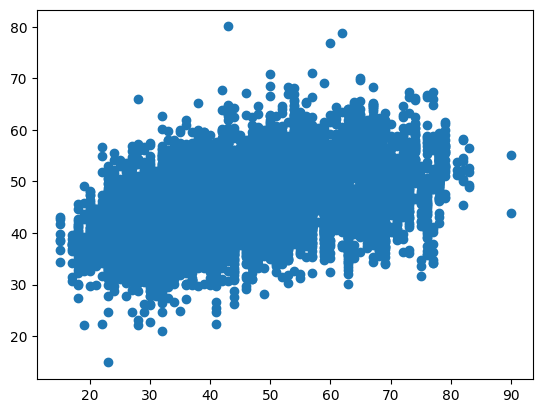

In [60]:
predictions_age = model_age.predict(X_test)

predictions_age_int = []
for i in predictions_age:
  predictions_age_int.append(round(float(i)))

print(predictions_age)

predictions_age_list = []
for i in predictions_age:
  predictions_age_list.append(float(i))

print(predictions_age_list)



print(true_age)
print(predictions_age_int)

display(plt.scatter(y_test_age, predictions_age))

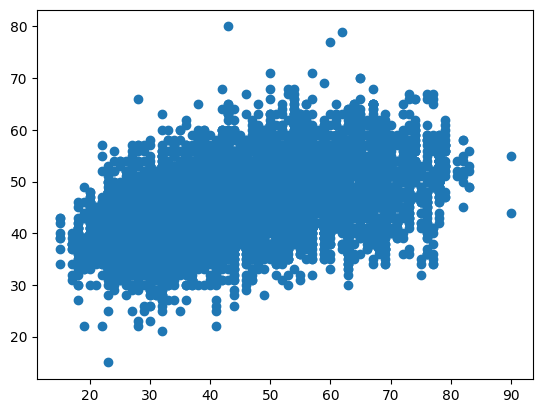

In [61]:
display(plt.scatter(y_test_age, predictions_age_int))

In [62]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)

0.4707879582785698 0.0
0.48517690566637717 0.0


In [63]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_int)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_int)
print(rsq, p)

0.46968270716048854 0.0
0.4840698926075505 0.0


(array([  11.,  281., 1429., 2563., 2598., 2053., 1127.,  523.,  109.,
          13.]),
 array([-37.90349337, -29.51170918, -21.11992499, -12.72814079,
         -4.3363566 ,   4.05542759,  12.44721178,  20.83899597,
         29.23078016,  37.62256436,  46.01434855]),
 <BarContainer object of 10 artists>)

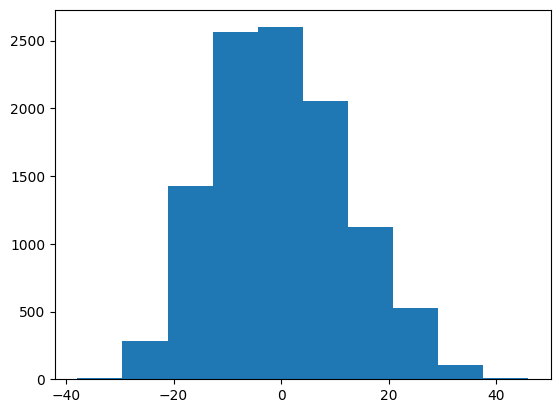

In [64]:
plt.hist(y_test_age - predictions_age)

In [65]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(y_test_age, predictions_age))
# MSE
print(metrics.mean_squared_error(y_test_age, predictions_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_age, predictions_age)))

10.13926571328556
154.95620764186452
12.448140730320514


In [66]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(y_test_age, predictions_age_int))
# MSE
print(metrics.mean_squared_error(y_test_age, predictions_age_int))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_age, predictions_age_int)))

10.140935836368731
155.16176333239937
12.456394475625737


<ipython-input-67-ec17677dcd78>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_gap.append(int(abs(predictions_age[i] - list(y_test_age['age'])[i])))


[17, 9, 7, 18, 11, 16, 11, 8, 13, 7, 13, 14, 18, 14, 12, 25, 21, 12, 7, 4, 6, 6, 3, 7, 14, 3, 4, 23, 8, 19, 22, 15, 24, 21, 22, 19, 21, 0, 2, 1, 4, 6, 4, 2, 4, 5, 9, 17, 12, 5, 3, 12, 1, 7, 7, 8, 7, 11, 17, 7, 11, 7, 7, 1, 4, 13, 13, 17, 5, 6, 8, 4, 3, 11, 11, 11, 16, 22, 21, 23, 25, 27, 24, 26, 26, 26, 28, 26, 9, 2, 4, 9, 10, 10, 3, 1, 1, 4, 1, 10, 18, 19, 21, 14, 17, 15, 14, 21, 1, 14, 19, 19, 18, 13, 10, 16, 10, 10, 5, 3, 4, 1, 9, 6, 3, 5, 6, 2, 2, 12, 2, 1, 0, 9, 7, 0, 13, 13, 14, 15, 22, 10, 7, 14, 3, 4, 3, 8, 6, 3, 8, 8, 13, 11, 7, 19, 19, 13, 1, 1, 4, 4, 1, 12, 13, 16, 10, 18, 24, 3, 5, 1, 5, 3, 2, 3, 1, 4, 5, 1, 8, 12, 7, 3, 6, 10, 1, 16, 23, 19, 18, 17, 7, 7, 14, 16, 9, 9, 17, 7, 16, 16, 22, 18, 22, 16, 0, 4, 0, 1, 3, 0, 0, 4, 0, 1, 10, 10, 8, 19, 17, 11, 14, 16, 16, 17, 17, 17, 19, 17, 16, 20, 21, 7, 6, 4, 7, 1, 4, 9, 5, 5, 16, 25, 26, 23, 23, 24, 20, 15, 11, 19, 13, 12, 7, 12, 10, 14, 9, 2, 16, 20, 14, 2, 9, 6, 7, 0, 2, 11, 8, 7, 5, 6, 15, 13, 6, 10, 3, 1, 9, 4, 13, 15, 16, 

0.145491233590018 9.740450279341444e-52
0.032905275256495926 0.000660706150470774


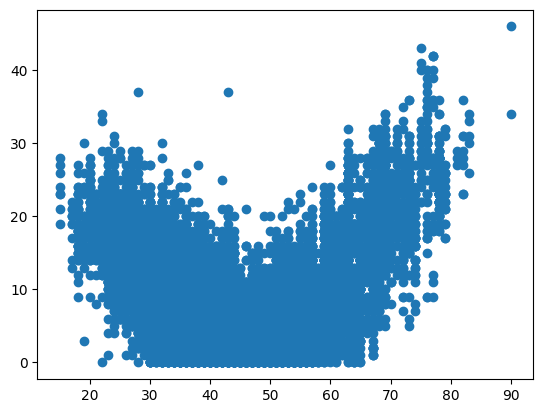

In [67]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predictions_age[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [34]:
import pickle
from google.colab import files

with open("LinearRegressionAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("LinearRegressionAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Logistic Regression to Predict Age

In [68]:
from sklearn.linear_model import LogisticRegression
model_age = LogisticRegression()
model_age.fit(X_train, y_train_age)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
predictions_age = model_age.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
classification_report(y_test_age, predictions_age)

'              precision    recall  f1-score   support\n\n        15.0       0.83      0.62      0.71         8\n        17.0       0.83      0.91      0.87        11\n        18.0       0.83      0.88      0.85        40\n        19.0       0.52      0.58      0.55        26\n        20.0       0.50      0.37      0.43        51\n        21.0       0.30      0.32      0.31        41\n        22.0       0.12      0.09      0.11        64\n        23.0       0.20      0.16      0.18       113\n        24.0       0.16      0.18      0.17       170\n        25.0       0.31      0.37      0.34       178\n        26.0       0.13      0.06      0.08       143\n        27.0       0.19      0.17      0.18       181\n        28.0       0.24      0.20      0.22       218\n        29.0       0.16      0.14      0.15       122\n        30.0       0.33      0.08      0.13       182\n        31.0       0.27      0.33      0.29       293\n        32.0       0.23      0.26      0.25       305\n       

In [71]:
from sklearn.metrics import confusion_matrix
print(list(y_test_age['age']))
print(list(predictions_age))

[31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 35.0, 35.0, 31.0, 31.0, 31.0, 31.0, 69.0, 69.0, 29.0, 29.0, 43.0, 43.0, 43.0, 43.0, 32.0, 32.0, 51.0, 51.0, 55.0, 55.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 46.0, 46.0, 46.0, 29.0, 29.0, 29.0, 29.0, 29.0, 65.0, 65.0, 23.0, 23.0, 39.0, 39.0, 35.0, 35.0, 35.0, 35.0, 35.0, 31.0, 31.0, 31.0, 31.0, 31.0, 43.0, 43.0, 43.0, 43.0, 25.0, 25.0, 51.0, 51.0, 51.0, 51.0, 49.0, 49.0, 34.0, 34.0, 34.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 31.0, 31.0, 31.0, 36.0, 36.0, 36.0, 46.0, 46.0, 46.0, 46.0, 36.0, 36.0, 69.0, 69.0, 69.0, 69.0, 25.0, 25.0, 25.0, 25.0, 67.0, 67.0, 67.0, 67.0, 67.0, 56.0, 56.0, 56.0, 56.0, 46.0, 46.0, 46.0, 44.0, 44.0, 54.0, 54.0, 44.0, 44.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 27.0, 27.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 44.0, 44.0, 54.0, 54.0, 54.0, 54.0, 40.0, 40.0, 40.0, 26.0, 26.0, 68.0, 68.0, 68.0, 37.0, 37.0, 37.0, 37.0, 37.0, 63.0, 63.0, 63.0, 63.

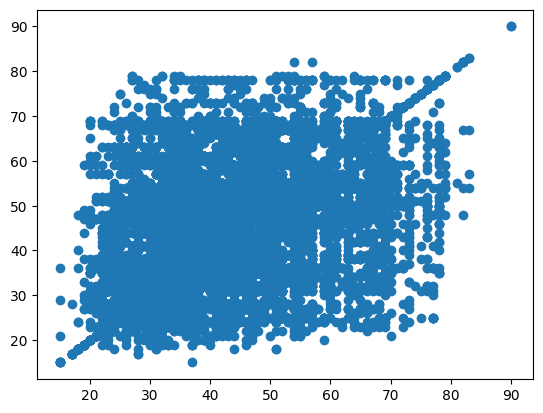

In [72]:
display(plt.scatter(y_test_age, predictions_age))

In [73]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), list(predictions_age))
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), list(predictions_age))
print(rsq, p)

0.49202993107952764 0.0
0.48187598870249115 0.0


In [74]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(y_test_age, predictions_age))
# MSE
print(metrics.mean_squared_error(y_test_age, predictions_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test_age, predictions_age)))

9.72345194732418
203.16587279349957
14.25362665406596


[23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 2.0, 2.0, 15.0, 15.0, 12.0, 23.0, 19.0, 0.0, 0.0, 1.0, 2.0, 11.0, 1.0, 26.0, 26.0, 6.0, 18.0, 7.0, 15.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.0, 0.0, 0.0, 19.0, 2.0, 15.0, 13.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 9.0, 15.0, 0.0, 18.0, 11.0, 0.0, 8.0, 14.0, 14.0, 1.0, 23.0, 32.0, 14.0, 4.0, 11.0, 9.0, 5.0, 9.0, 3.0, 0.0, 0.0, 24.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 9.0, 25.0, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 16.0, 10.0, 10.0, 2.0, 8.0, 8.0, 3.0, 3.0, 8.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 23.0, 13.0, 13.0, 13.0, 25.0, 13.0, 13.0, 10.0, 0.0, 25.0, 1.0, 21.0, 8.0, 0.0, 23.0, 4.0, 6.0, 14.0, 21.0, 2.0, 17.0, 0.0, 0.0, 17.0, 0.0, 14.0, 0.0, 0.0, 0.0, 1.0, 6.0, 6.0, 18.0, 25.0, 21.0, 0.0, 3.0, 0.0, 0.0, 15.0, 19.0, 9.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 9.0, 9.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 6.0, 0.0, 0.0, 0.0, 35.0, 16.0, 0.0, 16.0, 16.0, 6.0, 21.0, 21.0, 5.0, 1.0, 20.0, 2.0, 8.0, 20.0, 17.0, 17.0, 2.0, 20.0, 9.

-0.03215241442392628 0.00087650653266707
-0.07358227890152363 2.4718359006595035e-14


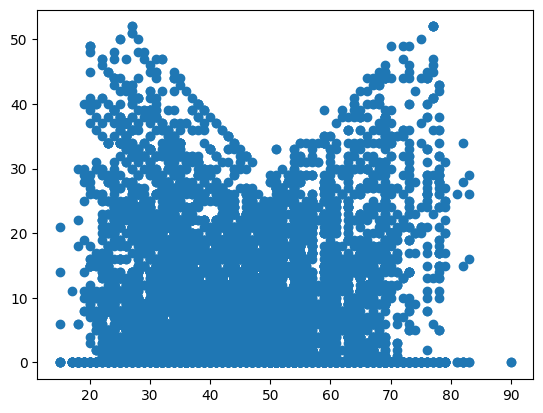

In [75]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(abs(predictions_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("LogisticRegressionAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("LogisticRegressionAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Binary Classification Gender

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [77]:
inputs = ['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'loudnessPeaksPerSec',
       'VoicedSegmentsPerSec', 'MeanVoicedSegmentLengthSec',
       'StddevVoicedSegmentLengthSec', 'MeanUnvoicedSegmentLength',
       'StddevUnvoicedSegmentLength']

In [78]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_gender = tf.convert_to_tensor(y_train_gender, dtype=tf.float32)

model_gender = Sequential()
model_gender.add(Dense(units=16, activation='relu', input_shape=(len(inputs),)))
model_gender.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
model_gender.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model_gender.fit(X_train, y_train_gender, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 62), found shape=(None, 88)


In [ ]:
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_gender = tf.convert_to_tensor(y_test_gender, dtype=tf.float32)

loss_and_metrics = model_gender.evaluate(X_test, y_test_gender)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

80/80 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.9127
[0.23345670104026794, 0.9126859903335571]
Loss =  0.23345670104026794
Accuracy =  0.9126859903335571


80/80 [==============================] - 0s 2ms/step


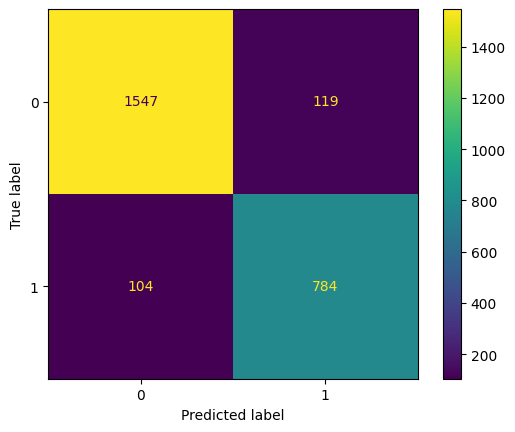

In [ ]:
predicted_gender = model_gender.predict(X_test)
predicted_gender = tf.squeeze(predicted_gender)
predicted_gender = np.array([1 if x >= 0.5 else 0 for x in predicted_gender])
actual = np.array(y_test_gender)
conf_mat = confusion_matrix(actual, predicted_gender)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
import pickle
from google.colab import files

with open("BinaryClassificationGender.pkl", "wb") as f:
    pickle.dump(model_gender, f)
    files.download("BinaryClassificationGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Deep Learning Regression for Age

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [80]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[-7.8720730e-03  3.0037547e-03 -7.7585615e-03 -8.1669353e-03
  -6.5970127e-03  9.8775898e-04  6.0194789e-04  5.6486361e-04
   4.3913606e-04  1.3226119e-04  5.7267840e-04  1.4146485e-03
  -5.0081190e-04  4.2078193e-04  1.2998999e-03  2.2991223e-03
   7.2409870e-04  3.5126804e-04 -1.7567979e-03 -1.0202947e-03
   1.7128609e-03 -3.7331722e-04  4.0268078e-03 -7.5715297e-04
   6.9720726e-03  2.7223825e-04  9.8586909e-04 -2.4203303e-04
   3.3283373e-03  4.7336527e-04  1.8662587e-03 -1.2435038e-03
   2.8084570e-03  2.7539392e-03 -5.7779197e-03  3.6884047e-04
  -2.3599125e-03  3.1489765e-04  3.9810603e-03 -1.5952492e-03
  -3.1591055e-03 -9.4230077e-04 -1.5436180e-03 -3.6789395e-03
  -1.3621703e-03  6.1318569e-04 -1.0214266e-03  2.9744587e-03
  -1.8778874e-03 -2.1958596e-03 -3.4618233e-03  2.8416503e-03
  -2.6842654e-05  1.2083934e-03 -1.7138846e-03  7.1267306e-04
  -3.5463963e-03  2.8495239e-03 -5.7492321e-03  3.4084772e-03
   4.6797819e-03 -1.4576387e-04 -6.4596571e-03  2.7499086e-04
  -5.390

In [81]:
model_age = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_age.predict(X_train)
model_age.layers[1].kernel
model_age.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
#%%time
history = model_age.fit(
    X_train,
    y_train_age,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

388/388 [==============================] - 1s 1ms/step
Epoch 1/100
310/310 [==============================] - 1s 3ms/step - loss: 31.3613 - val_loss: 18.7516
Epoch 2/100
310/310 [==============================] - 1s 3ms/step - loss: 12.6214 - val_loss: 11.5899
Epoch 3/100
310/310 [==============================] - 1s 4ms/step - loss: 10.8420 - val_loss: 11.2383
Epoch 4/100
310/310 [==============================] - 1s 4ms/step - loss: 10.6875 - val_loss: 10.8885
Epoch 5/100
310/310 [==============================] - 1s 3ms/step - loss: 10.6433 - val_loss: 10.5457
Epoch 6/100
310/310 [==============================] - 1s 2ms/step - loss: 10.5696 - val_loss: 10.6613
Epoch 7/100
310/310 [==============================] - 1s 2ms/step - loss: 10.5380 - val_loss: 10.4728
Epoch 8/100
310/310 [==============================] - 1s 2ms/step - loss: 10.5456 - val_loss: 10.8514
Epoch 9/100
310/310 [==============================] - 1s 2ms/step - loss: 10.5305 - val_loss: 10.5025
Epoch 10/100
310/3

In [82]:
test_results = {}
test_results['linear_model'] = model_age.evaluate(
    X_test, y_test_age)

335/335 [==============================] - 1s 2ms/step - loss: 10.3627


In [87]:
predictions_age = model_age.predict(X_test)
predictions_age_list = []
predictions_age_int = []
for i in range(len(predictions_age)):
  b = predictions_age[i]
  if (abs(b[0] - true_age[i])) < 50:
    predictions_age_list.append(b[0])
  else:
    predictions_age_list.append(true_age[i])
  predictions_age_int.append(round(b[0]))


print(list(predictions_age_list))
print(list(predictions_age_int))
print(list(true_age))

335/335 [==============================] - 1s 4ms/step
[48.715015, 42.260284, 23.050953, 35.92721, 40.75166, 41.234108, 39.907917, 33.902504, 37.39389, 46.20215, 46.939777, 46.96747, 51.63022, 47.498817, 47.066635, 40.827198, 44.654133, 42.807274, 35.51723, 47.186584, 46.57037, 47.58926, 43.97995, 37.140343, 46.17932, 40.503242, 43.305435, 34.45481, 46.376495, 50.325665, 43.352505, 50.34804, 44.733505, 50.37846, 43.945614, 47.766457, 45.2041, 45.649815, 49.335213, 44.17558, 31.63266, 34.14133, 26.529457, 21.452887, 32.131577, 65.44038, 51.682205, 41.23219, 31.750332, 48.1051, 36.62973, 43.252266, 36.70494, 41.10707, 40.961044, 39.97548, 41.10856, 48.912, 48.12943, 44.30014, 40.150143, 50.036438, 47.699303, 44.55579, 50.66533, 36.955788, 36.297626, 33.166954, 44.69999, 44.952568, 41.36811, 57.68048, 54.3269, 44.19214, 48.383606, 42.87187, 41.338608, 41.285744, 34.04702, 33.53119, 30.599087, 31.199549, 29.899187, 30.63978, 29.666103, 35.05166, 25.331856, 26.65902, 33.892567, 23.336113, 3

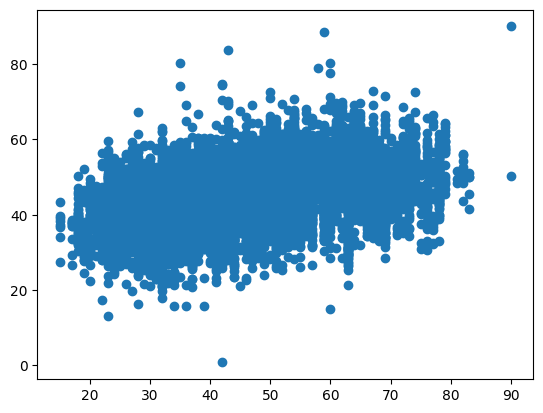

In [88]:
display(plt.scatter(true_age, predictions_age_list))

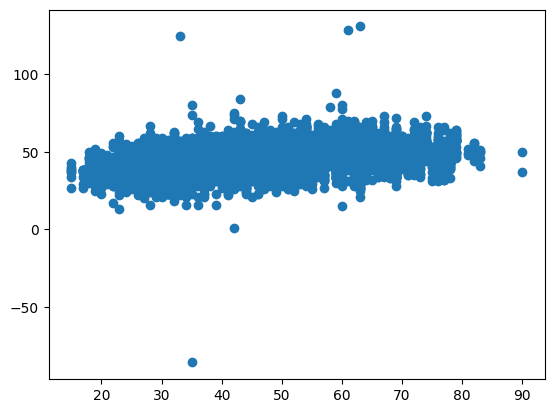

In [89]:
display(plt.scatter(true_age, predictions_age_int))

In [90]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)

0.4271090348634934 0.0
0.44417353309803903 0.0


In [91]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_int)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_int)
print(rsq, p)

0.4163230342400141 0.0
0.44367379932294704 0.0


In [92]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predictions_age_list))
# MSE
print(metrics.mean_squared_error(true_age, predictions_age_list))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predictions_age_list)))

10.325218497643542
167.36021721400735
12.936777698252659


In [93]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predictions_age_int))
# MSE
print(metrics.mean_squared_error(true_age, predictions_age_int))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predictions_age_int)))

10.359671243111983
170.6411693284767
13.06296939169945


<ipython-input-148-cfbef30348ed>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = int(abs(predictions_age[i] - list(y_test_age['age'])[i]))


[1, 1, 9, 4, 1, 0, 3, 4, 0, 1, 0, 0, 2, 0, 1, 14, 18, 11, 0, 2, 2, 8, 6, 1, 16, 3, 5, 15, 0, 2, 12, 11, 17, 14, 8, 0, 14, 1, 1, 4, 2, 13, 3, 1, 0, 2, 1, 1, 0, 7, 1, 7, 6, 4, 1, 1, 1, 0, 3, 2, 1, 2, 1, 2, 5, 2, 1, 2, 1, 2, 7, 17, 1, 10, 2, 11, 0, 2, 3, 3, 0, 3, 8, 1, 0, 2, 1, 0, 4, 4, 2, 0, 5, 1, 7, 3, 0, 2, 4, 7, 1, 2, 1, 0, 4, 12, 4, 16, 4, 7, 15, 4, 3, 8, 0, 0, 2, 0, 3, 11, 1, 1, 10, 2, 0, 12, 1, 4, 1, 9, 0, 3, 4, 1, 3, 0, 3, 2, 11, 0, 21, 0, 1, 4, 0, 3, 1, 1, 8, 1, 8, 3, 4, 1, 0, 19, 14, 8, 1, 0, 9, 0, 0, 3, 0, 2, 13, 7, 17, 1, 10, 0, 5, 0, 3, 5, 3, 0, 9, 3, 4, 8, 1, 0, 4, 1, 11, 0, 18, 14, 16, 9, 0, 1, 0, 10, 12, 1, 5, 0, 3, 2, 5, 2, 3, 1, 1, 4, 1, 4, 0, 5, 0, 2, 2, 1, 0, 4, 0, 7, 0, 2, 0, 1, 1, 4, 0, 3, 0, 1, 1, 2, 1, 0, 1, 3, 0, 1, 0, 3, 7, 0, 1, 0, 3, 9, 26, 16, 19, 6, 1, 15, 1, 12, 0, 1, 14, 0, 6, 0, 0, 12, 14, 8, 11, 0, 4, 4, 3, 6, 4, 6, 5, 0, 0, 5, 6, 2, 4, 2, 0, 1, 0, 7, 2, 11, 3, 7, 23, 7, 3, 5, 0, 0, 13, 1, 10, 0, 0, 3, 2, 1, 18, 7, 5, 2, 2, 2, 1, 0, 0, 1, 6, 8, 0, 1, 0, 0

0.09099628333763884 3.936695039232091e-21
0.027754846751790137 0.004077015628290429


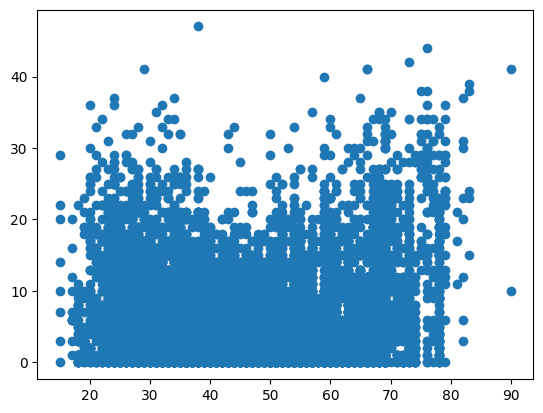

In [148]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  x = int(abs(predictions_age[i] - list(y_test_age['age'])[i]))
  if x < 50:
    age_gap.append(x)
  else:
    age_gap.append(10)
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("BasicDNNAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("BasicDNNAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DenseNet Age

In [95]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [96]:
model_age = build_and_compile_model(normalizer)
model_age.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 88)                177       
 on)                                                             
                                                                 
 dense_3 (Dense)             (None, 64)                5696      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10098 (39.45 KB)
Trainable params: 9921 (38.75 KB)
Non-trainable params: 177 (712.00 Byte)
_________________________________________________________________


In [97]:
history = model_age.fit(
    X_train,
    y_train_age,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
310/310 [==============================] - 2s 3ms/step - loss: 18.1822 - val_loss: 12.3093
Epoch 2/100
310/310 [==============================] - 1s 5ms/step - loss: 11.5639 - val_loss: 11.6752
Epoch 3/100
310/310 [==============================] - 1s 4ms/step - loss: 10.9259 - val_loss: 11.2869
Epoch 4/100
310/310 [==============================] - 2s 5ms/step - loss: 10.5356 - val_loss: 11.1085
Epoch 5/100
310/310 [==============================] - 1s 2ms/step - loss: 10.2243 - val_loss: 11.0477
Epoch 6/100
310/310 [==============================] - 1s 3ms/step - loss: 10.0058 - val_loss: 10.9940
Epoch 7/100
310/310 [==============================] - 1s 2ms/step - loss: 9.8654 - val_loss: 10.6982
Epoch 8/100
310/310 [==============================] - 1s 3ms/step - loss: 9.6579 - val_loss: 10.8093
Epoch 9/100
310/310 [==============================] - 1s 3ms/step - loss: 9.4824 - val_loss: 10.5990
Epoch 10/100
310/310 [==============================] - 1s 3ms/step - loss: 

In [98]:
test_results['dnn_model'] = model_age.evaluate(X_test, y_test_age)

335/335 [==============================] - 1s 2ms/step - loss: 6.4641


In [105]:
predictions_age = model_age.predict(X_test)
predictions_age_list = []
predictions_age_int = []
for i in range(len(predictions_age)):
  b = predictions_age[i]
  if (abs(b[0] - true_age[i])) < 50:
    predictions_age_list.append(b[0])
  else:
    predictions_age_list.append(true_age[i])
print(list(predictions_age_list))
print(list(true_age))

335/335 [==============================] - 3s 9ms/step
[32.536747, 29.61113, 40.29014, 35.188545, 32.521214, 30.981234, 34.16535, 26.613184, 30.674036, 33.48465, 35.67147, 31.869764, 33.1108, 30.8112, 32.674885, 54.37549, 50.705463, 40.735622, 29.444838, 45.244423, 45.610413, 51.21772, 49.66079, 33.04736, 48.771748, 47.21402, 45.48673, 39.91632, 55.16059, 66.40926, 56.83014, 57.700054, 51.34257, 54.39499, 60.67427, 68.457634, 54.441376, 47.18981, 47.929047, 50.302246, 31.854647, 42.1715, 25.755968, 30.211395, 28.855295, 62.8749, 63.425533, 24.798178, 23.911236, 46.63739, 37.218414, 42.12056, 41.52898, 39.844997, 36.3079, 33.95151, 29.152372, 30.50509, 34.2392, 28.796534, 32.328636, 45.65917, 44.630383, 40.145306, 48.22664, 27.78005, 26.937834, 48.491592, 49.87777, 53.231865, 43.9374, 66.71244, 50.790222, 44.18647, 36.32071, 45.600796, 63.83953, 65.43215, 59.726936, 66.35237, 63.267345, 59.877617, 54.07159, 64.38503, 62.555492, 60.52607, 64.01828, 62.65973, 35.942215, 35.40716, 28.67993

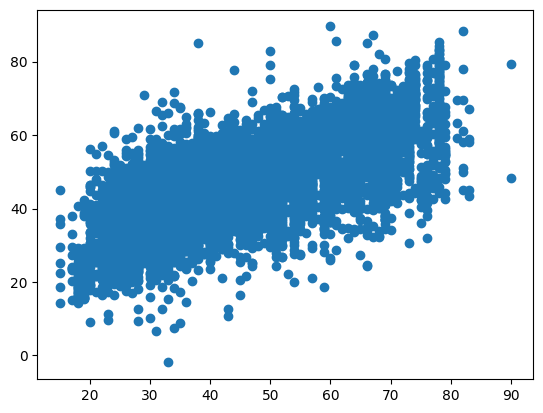

In [110]:
display(plt.scatter(true_age, predictions_age_list))

In [111]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predictions_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)

0.7657103021286253 0.0
0.7732129168218135 0.0


In [112]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predictions_age_list))
# MSE
print(metrics.mean_squared_error(true_age, predictions_age_list))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predictions_age_list)))

6.3411151625322475
83.29079540066324
9.126379095822355


<ipython-input-116-ef99ce6e0e71>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = int(abs(predictions_age[i] - true_age[i]))


[1, 1, 9, 4, 1, 0, 3, 4, 0, 1, 0, 0, 2, 0, 1, 14, 18, 11, 0, 2, 2, 8, 6, 1, 16, 3, 5, 15, 0, 2, 12, 11, 17, 14, 8, 0, 14, 1, 1, 4, 2, 13, 3, 1, 0, 2, 1, 1, 0, 7, 1, 7, 6, 4, 1, 1, 1, 0, 3, 2, 1, 2, 1, 2, 5, 2, 1, 2, 1, 2, 7, 17, 1, 10, 2, 11, 0, 2, 3, 3, 0, 3, 8, 1, 0, 2, 1, 0, 4, 4, 2, 0, 5, 1, 7, 3, 0, 2, 4, 7, 1, 2, 1, 0, 4, 12, 4, 16, 4, 7, 15, 4, 3, 8, 0, 0, 2, 0, 3, 11, 1, 1, 10, 2, 0, 12, 1, 4, 1, 9, 0, 3, 4, 1, 3, 0, 3, 2, 11, 0, 21, 0, 1, 4, 0, 3, 1, 1, 8, 1, 8, 3, 4, 1, 0, 19, 14, 8, 1, 0, 9, 0, 0, 3, 0, 2, 13, 7, 17, 1, 10, 0, 5, 0, 3, 5, 3, 0, 9, 3, 4, 8, 1, 0, 4, 1, 11, 0, 18, 14, 16, 9, 0, 1, 0, 10, 12, 1, 5, 0, 3, 2, 5, 2, 3, 1, 1, 4, 1, 4, 0, 5, 0, 2, 2, 1, 0, 4, 0, 7, 0, 2, 0, 1, 1, 4, 0, 3, 0, 1, 1, 2, 1, 0, 1, 3, 0, 1, 0, 3, 7, 0, 1, 0, 3, 9, 26, 16, 19, 6, 1, 15, 1, 12, 0, 1, 14, 0, 6, 0, 0, 12, 14, 8, 11, 0, 4, 4, 3, 6, 4, 6, 5, 0, 0, 5, 6, 2, 4, 2, 0, 1, 0, 7, 2, 11, 3, 7, 23, 7, 3, 5, 0, 0, 13, 1, 10, 0, 0, 3, 2, 1, 18, 7, 5, 2, 2, 2, 1, 0, 0, 1, 6, 8, 0, 1, 0, 0

0.09209752155242912 1.3102539873142403e-21
0.027859404059875286 0.003939516861064206


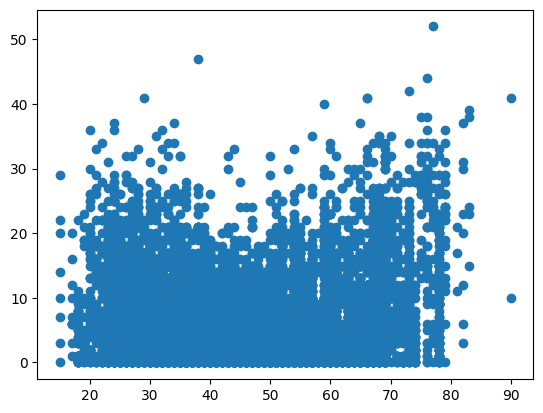

In [116]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  v = int(abs(predictions_age[i] - true_age[i]))
  if v < 100:
    age_gap.append(v)
  else:
    age_gap.append(10)
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, age_gap)
print(rsq, p)

In [149]:
import pickle
from google.colab import files

with open("DenseNetAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("DenseNetAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ResNet Model for Age

In [117]:
print(type(y_train_age))

<class 'pandas.core.frame.DataFrame'>


In [118]:
# rerun initial cells where X_train, X_test defined

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
n_samples, n_features = X_train.shape
inp_size = n_features
out_size = 1
model_age = nn.Linear(inp_size, out_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_age.parameters(), lr=0.001)
epochs = 5000
#X_train = torch.from_numpy(X_train.to_numpy().astype('float32'))
#X_train = torch.from_numpy(X_train.astype('float32'))
y_temp = torch.from_numpy(y_train_age.to_numpy().astype('float32'))
for epoch in range(epochs):
  predicted_age = model_age(X_train)
  loss = criterion(predicted_age, y_temp)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch+1)%10 == 0:
    print(epoch+1, loss.item())

TypeError: linear(): argument 'input' (position 1) must be Tensor, not tensorflow.python.framework.ops.EagerTensor

In [ ]:
#X_test = torch.from_numpy(X_test.astype('float32'))
predicted_age = model_age(X_test).tolist()
predicted_age_list = []
predicted_age_int = []
for i in predicted_age:
  if i[0] > 0:
    predicted_age_list.append(i[0])
    predicted_age_int.append(round(i[0]))
  else:
    predicted_age_list.append(50)
    predicted_age_int.append(50)
print(predicted_age_list)
print(predicted_age_int)
print(true_age)

[46.04330062866211, 46.065528869628906, 46.53510665893555, 46.24472427368164, 46.69589614868164, 44.6794319152832, 46.022926330566406, 48.388980865478516, 46.42617416381836, 45.90304946899414, 45.24796676635742, 53.458740234375, 45.88206481933594, 46.64519119262695, 45.05787658691406, 45.56785583496094, 45.56767654418945, 49.56624221801758, 46.50238037109375, 45.896629333496094, 45.337825775146484, 46.72727966308594, 45.20810317993164, 45.0516242980957, 45.80361557006836, 46.41626739501953, 46.026947021484375, 48.332359313964844, 46.47449493408203, 48.01665496826172, 45.23912048339844, 46.301876068115234, 46.09248352050781, 45.57980728149414, 43.7021598815918, 46.855716705322266, 45.8126106262207, 47.41691970825195, 44.3015251159668, 47.96220016479492, 44.900821685791016, 46.185665130615234, 45.63808059692383, 45.81774139404297, 45.531883239746094, 44.95342254638672, 47.30308151245117, 45.758731842041016, 46.66098403930664, 46.108707427978516, 45.268375396728516, 46.524566650390625, 46

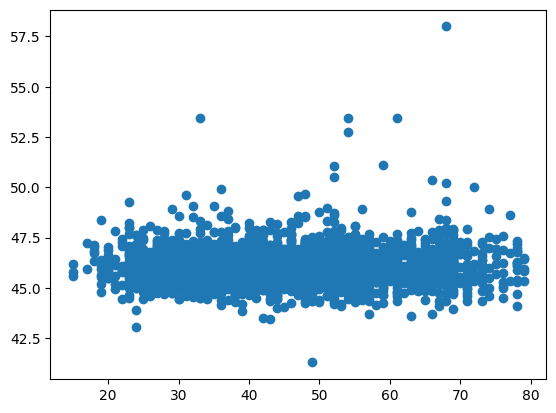

In [ ]:
display(plt.scatter(true_age, predicted_age_list))

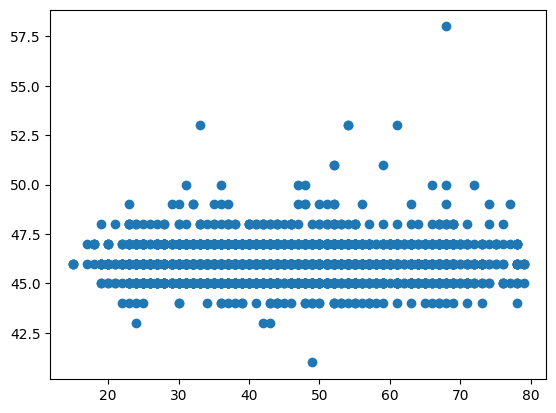

In [ ]:
display(plt.scatter(true_age, predicted_age_int))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predicted_age_list)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_list)
print(rsq, p)


0.019498516271147973 0.32461915576409645
0.012607682725596103 0.5242099744987501


In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, predicted_age_int)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_age_int)
print(rsq, p)


0.020333436311711275 0.30432801472229204
0.011816807521594093 0.5505635613812849


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predicted_age_list))
# MSE
print(metrics.mean_squared_error(true_age, predicted_age_list))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predicted_age_list)))

11.407246048224561
187.51311631253265
13.693542869269905


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, predicted_age_int))
# MSE
print(metrics.mean_squared_error(true_age, predicted_age_int))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, predicted_age_int)))

11.406812842599843
187.55873140172278
13.695208337288001


[8, 0, 19, 6, 14, 24, 10, 5, 3, 17, 8, 16, 1, 8, 10, 13, 8, 18, 17, 10, 23, 9, 13, 15, 2, 0, 9, 0, 6, 5, 2, 27, 16, 0, 5, 0, 25, 21, 24, 0, 8, 2, 14, 9, 5, 1, 14, 2, 7, 5, 2, 22, 21, 2, 10, 17, 22, 1, 10, 19, 4, 20, 18, 8, 2, 5, 8, 1, 24, 13, 10, 22, 3, 21, 12, 12, 7, 19, 1, 18, 5, 10, 4, 22, 6, 19, 16, 7, 23, 2, 10, 13, 14, 3, 0, 8, 14, 22, 3, 16, 15, 9, 2, 22, 8, 22, 9, 13, 3, 28, 19, 8, 1, 5, 10, 12, 14, 19, 8, 10, 20, 13, 12, 10, 25, 32, 11, 7, 21, 24, 13, 9, 3, 28, 18, 5, 6, 10, 2, 16, 18, 32, 4, 6, 4, 22, 6, 18, 23, 18, 7, 23, 0, 14, 13, 4, 9, 0, 10, 2, 4, 15, 2, 20, 7, 22, 19, 23, 1, 18, 12, 12, 3, 5, 7, 14, 25, 7, 8, 16, 2, 7, 8, 4, 5, 12, 12, 12, 19, 13, 0, 12, 7, 7, 20, 16, 2, 20, 10, 7, 11, 3, 16, 19, 14, 10, 5, 4, 14, 20, 8, 7, 15, 12, 21, 22, 16, 14, 2, 18, 16, 9, 1, 13, 6, 6, 2, 15, 8, 10, 14, 13, 15, 10, 16, 8, 27, 14, 10, 7, 4, 27, 15, 13, 2, 8, 3, 0, 0, 10, 10, 3, 9, 20, 18, 6, 12, 30, 5, 20, 16, 1, 28, 5, 3, 16, 11, 0, 13, 10, 0, 11, 10, 16, 16, 20, 6, 3, 4, 14, 8, 9,

-0.0016911543177010819 0.9319240890683067
0.00440682353024012 0.8238466773534335


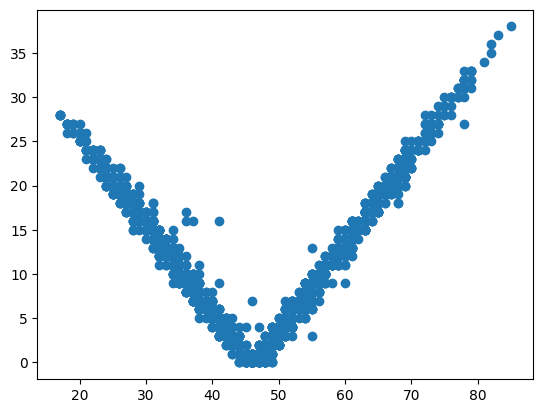

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predicted_age_list[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("ResnetAge.pkl", "wb") as f:
    pickle.dump(model_age, f)
    files.download("ResnetAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
from sklearn.linear_model import Ridge
rgc = Ridge(alpha=0.01, random_state=10)
rgc.fit(X_train, y_train_age)

Ridge(alpha=0.01, random_state=10)

[[48.26590227]
 [40.66765544]
 [38.06631069]
 ...
 [41.16217121]
 [36.75123032]
 [38.95717293]]
[31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 35.0, 35.0, 31.0, 31.0, 31.0, 31.0, 69.0, 69.0, 29.0, 29.0, 43.0, 43.0, 43.0, 43.0, 32.0, 32.0, 51.0, 51.0, 55.0, 55.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 46.0, 46.0, 46.0, 29.0, 29.0, 29.0, 29.0, 29.0, 65.0, 65.0, 23.0, 23.0, 39.0, 39.0, 35.0, 35.0, 35.0, 35.0, 35.0, 31.0, 31.0, 31.0, 31.0, 31.0, 43.0, 43.0, 43.0, 43.0, 25.0, 25.0, 51.0, 51.0, 51.0, 51.0, 49.0, 49.0, 34.0, 34.0, 34.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 31.0, 31.0, 31.0, 36.0, 36.0, 36.0, 46.0, 46.0, 46.0, 46.0, 36.0, 36.0, 69.0, 69.0, 69.0, 69.0, 25.0, 25.0, 25.0, 25.0, 67.0, 67.0, 67.0, 67.0, 67.0, 56.0, 56.0, 56.0, 56.0, 46.0, 46.0, 46.0, 44.0, 44.0, 54.0, 54.0, 44.0, 44.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 27.0, 27.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 44.0, 44.0, 54.0, 54.0, 54.0, 54.0, 40.

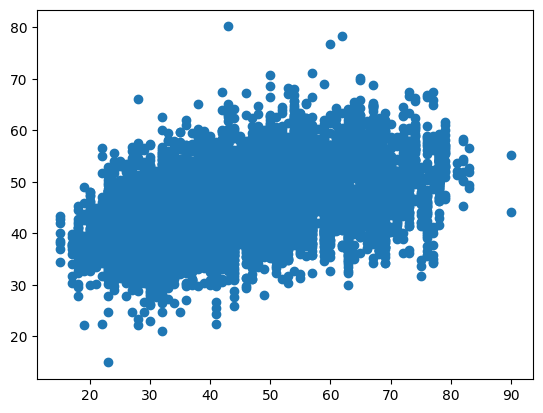

In [160]:
predictions_list = rgc.predict(X_test)
print(predictions_list)
print(true_age)
display(plt.scatter(y_test_age, predictions_list))

pred = []
for i in predictions_list:
  pred.append(i[0])

In [161]:
from scipy.stats import pearsonr
rsq, p = pearsonr(true_age, pred)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(true_age, predictions_list)
print(rsq, p)

0.4707564636482261 0.0
0.48504002212488406 0.0


In [162]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(true_age, pred))
# MSE
print(metrics.mean_squared_error(true_age, pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(true_age, pred)))

10.139273257535498
154.9620803380294
12.448376614564223


[17, 9, 7, 18, 11, 16, 11, 8, 14, 7, 13, 14, 18, 14, 12, 25, 20, 12, 7, 4, 6, 6, 3, 7, 14, 3, 4, 23, 8, 18, 22, 15, 24, 21, 22, 19, 21, 0, 2, 1, 4, 6, 4, 2, 4, 5, 9, 17, 12, 5, 2, 12, 1, 7, 7, 8, 8, 11, 17, 7, 11, 7, 7, 1, 4, 13, 13, 17, 5, 6, 8, 4, 4, 11, 11, 11, 16, 21, 21, 23, 25, 26, 24, 26, 26, 26, 28, 26, 9, 2, 4, 9, 10, 10, 3, 1, 1, 4, 1, 11, 18, 18, 21, 14, 18, 15, 14, 21, 1, 15, 18, 19, 18, 13, 10, 16, 10, 10, 5, 3, 4, 0, 9, 6, 3, 5, 6, 2, 2, 12, 2, 1, 0, 9, 7, 0, 12, 13, 13, 15, 22, 10, 7, 14, 3, 4, 3, 8, 6, 3, 8, 8, 13, 11, 7, 20, 19, 13, 1, 1, 4, 4, 0, 12, 14, 16, 10, 18, 24, 3, 5, 1, 5, 3, 2, 3, 1, 3, 5, 1, 8, 12, 7, 3, 6, 10, 1, 16, 23, 19, 19, 17, 7, 7, 14, 15, 9, 9, 17, 7, 16, 16, 21, 18, 22, 16, 0, 4, 0, 0, 3, 0, 0, 5, 0, 1, 10, 10, 8, 19, 17, 11, 14, 16, 16, 17, 17, 17, 19, 17, 16, 20, 21, 7, 6, 4, 7, 1, 4, 10, 5, 5, 16, 25, 26, 22, 23, 24, 20, 15, 11, 18, 13, 12, 7, 12, 10, 14, 9, 2, 16, 20, 14, 2, 9, 6, 7, 0, 2, 11, 8, 7, 5, 6, 15, 13, 6, 10, 3, 1, 9, 4, 13, 15, 16,

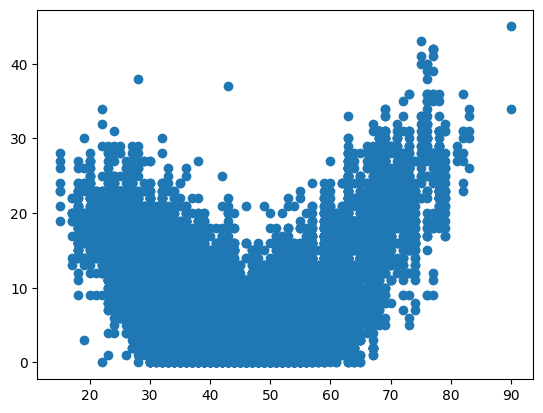

In [165]:
age_gap = []
l = len(list(pred))
for i in range(l):
  age_gap.append(int(abs(pred[i] - true_age[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

In [145]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

simple_stack = StackingRegressor(meta_regressor=SVR(),
                  regressors=[SVR(kernel='linear'), LinearRegression(),
                              Ridge(random_state=1)])
simple_stack.fit(X_train, y_train_age)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([49.75452254, 36.92344811, 34.39891006, ..., 37.37331858,
       33.47205415, 35.04350206])

[49.7545225449802, 36.92344811182609, 34.398910063637764, 47.80043157860475, 40.65368381158807, 46.95621318575462, 38.75759178902322, 35.33636437471094, 47.163267906339925, 39.79415072078849, 46.12298880605283, 45.300165946871054, 51.799559360757755, 44.81365579646494, 42.88886427321802, 41.16894660828743, 50.15776704798196, 37.03396114490839, 33.34016900992928, 48.8249275605518, 50.560528527576274, 50.17239807184587, 46.73654109312523, 35.637355735086146, 46.877380911873445, 45.200707347559266, 45.869810982115716, 32.009259695300514, 44.38301584160947, 51.724137383002954, 46.44519038711374, 53.952560508597244, 44.64315091635411, 48.60441316156666, 47.61850294449619, 51.79050463100031, 49.919401149423045, 46.09690212026086, 50.35334942576122, 43.901204590797036, 31.87350762154304, 33.03305643984971, 32.24663817334695, 32.20974455279037, 31.98573484185765, 50.750167778560545, 55.09618572436666, 36.08802620791834, 33.304403455796745, 42.98538586596691, 32.910625579741165, 47.826763566984

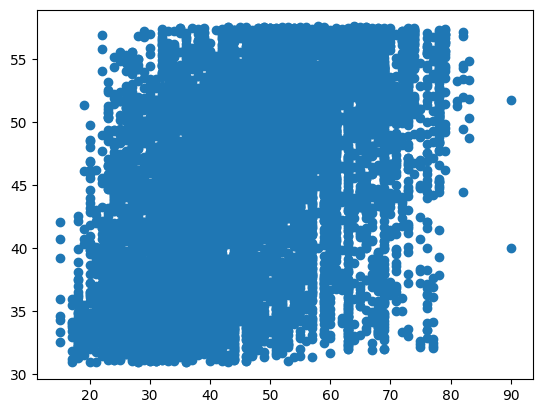

In [146]:
pred = list(simple_stack.predict(X_test))
print(pred)
print(true_age)
display(plt.scatter(y_test_age, pred))

Diferent Models

In [ ]:
df_tot = df_tot.dropna()
X = df_tot[['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm',
       'mfcc3_sma3_amean', 'mfcc3_sma3_stddevNorm', 'mfcc4_sma3_amean',
       'mfcc4_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'HNRdBACF_sma3nz_amean',
       'HNRdBACF_sma3nz_stddevNorm', 'logRelF0-H1-H2_sma3nz_amean',
       'logRelF0-H1-H2_sma3nz_stddevNorm', 'logRelF0-H1-A3_sma3nz_amean',
       'logRelF0-H1-A3_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2frequency_sma3nz_amean',
       'F2frequency_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F2bandwidth_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_amean',
       'F3bandwidth_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'alphaRatioV_sma3nz_amean',
       'alphaRatioV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_amean',
       'hammarbergIndexV_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean',
       'slopeV0-500_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_amean',
       'slopeV500-1500_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean',
       'spectralFluxV_sma3nz_stddevNorm', 'mfcc1V_sma3nz_amean',
       'mfcc1V_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'mfcc2V_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_amean',
       'mfcc4V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean',
       'hammarbergIndexUV_sma3nz_amean', 'slopeUV0-500_sma3nz_amean',
       'slopeUV500-1500_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanVoicedSegmentLengthSec', 'StddevVoicedSegmentLengthSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength',
       'equivalentSoundLevel_dBp']]
y_age = df_tot[['age']]
y_gender = df_tot[['gender']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train_age, y_test_age = train_test_split(X, y_age, random_state = 0 , train_size=0.8)
X_train, X_test, y_train_gender, y_test_gender = train_test_split(X, y_gender, random_state = 0 , train_size=0.8)


X = X_train
# X stays constant, but y will have 3 different ones
# y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [121]:
# Random Forrest age
y = y_train_age
clf = RandomForestClassifier(random_state = 0 , n_estimators=100)
model = clf.fit(X_train, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_train, y.values.ravel(), verbose=100)

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[Parallel(n_jobs=1)]: Done   0 tasks      | elapsed:    0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got array([  514,   515,  1042, ..., 12382, 12383, 12384])

In [91]:
predicted_age = model.predict(X_test)
print(list(predicted_age))
print(list(y_test_age['age']))

[59.0, 59.0, 54.0, 54.0, 61.0, 52.0, 45.0, 73.0, 40.0, 45.0, 48.0, 48.0, 48.0, 48.0, 39.0, 39.0, 39.0, 54.0, 30.0, 51.0, 51.0, 51.0, 34.0, 34.0, 34.0, 35.0, 45.0, 30.0, 36.0, 36.0, 33.0, 45.0, 36.0, 44.0, 36.0, 67.0, 48.0, 48.0, 48.0, 56.0, 54.0, 36.0, 36.0, 36.0, 36.0, 43.0, 24.0, 34.0, 34.0, 67.0, 34.0, 24.0, 44.0, 34.0, 24.0, 24.0, 34.0, 37.0, 46.0, 54.0, 61.0, 46.0, 51.0, 46.0, 55.0, 55.0, 49.0, 42.0, 36.0, 68.0, 68.0, 68.0, 68.0, 34.0, 29.0, 57.0, 34.0, 34.0, 34.0, 31.0, 31.0, 31.0, 33.0, 49.0, 44.0, 28.0, 56.0, 56.0, 37.0, 31.0, 57.0, 57.0, 50.0, 37.0, 30.0, 37.0, 37.0, 37.0, 61.0, 57.0, 37.0, 37.0, 28.0, 28.0, 44.0, 37.0, 44.0, 47.0, 44.0, 38.0, 38.0, 51.0, 69.0, 51.0, 50.0, 37.0, 37.0, 34.0, 73.0, 24.0, 33.0, 28.0, 33.0, 30.0, 34.0, 36.0, 40.0, 41.0, 18.0, 68.0, 20.0, 32.0, 32.0, 32.0, 46.0, 46.0, 51.0, 69.0, 69.0, 54.0, 48.0, 45.0, 25.0, 24.0, 24.0, 43.0, 51.0, 69.0, 50.0, 49.0, 43.0, 28.0, 44.0, 44.0, 59.0, 47.0, 38.0, 39.0, 38.0, 38.0, 38.0, 38.0, 34.0, 51.0, 52.0, 51.0, 38.

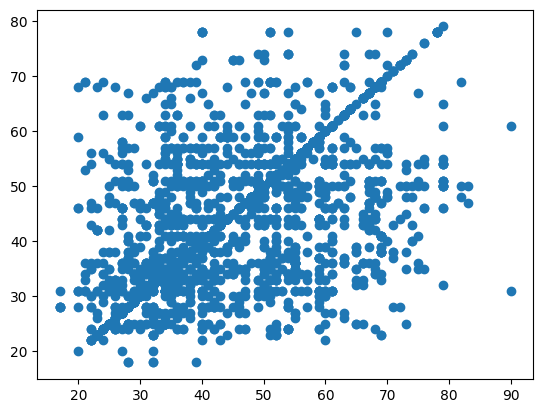

In [88]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [89]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.5514478329285967 3.552535454425611e-203
0.5603796860049344 3.7902077277436176e-211


In [90]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

7.802270947533281
164.14056382145654
12.8117353946082


[2, 1, 0, 10, 16, 1, 11, 15, 1, 0, 3, 2, 0, 3, 3, 19, 2, 0, 3, 4, 9, 8, 10, 13, 8, 5, 12, 2, 18, 34, 33, 13, 18, 12, 0, 13, 17, 0, 7, 14, 7, 4, 9, 1, 6, 17, 11, 0, 14, 2, 0, 6, 31, 17, 16, 13, 15, 9, 1, 9, 0, 0, 5, 3, 10, 5, 4, 13, 18, 8, 11, 19, 13, 2, 5, 27, 11, 11, 6, 9, 30, 20, 1, 4, 9, 2, 2, 6, 18, 25, 20, 25, 26, 27, 23, 0, 22, 32, 9, 0, 19, 14, 15, 4, 12, 9, 28, 14, 17, 15, 6, 8, 25, 17, 6, 11, 3, 1, 7, 8, 11, 0, 14, 9, 8, 21, 23, 0, 4, 31, 19, 5, 1, 44, 8, 8, 15, 9, 14, 10, 9, 3, 11, 8, 7, 1, 11, 0, 9, 27, 8, 8, 16, 8, 0, 28, 20, 44, 18, 37, 26, 25, 34, 6, 15, 12, 3, 10, 0, 4, 2, 8, 10, 10, 8, 16, 27, 13, 12, 0, 6, 5, 7, 1, 2, 2, 6, 9, 0, 1, 5, 2, 10, 5, 10, 3, 0, 1, 25, 6, 6, 6, 18, 27, 24, 36, 0, 7, 13, 2, 4, 18, 12, 19, 4, 5, 3, 2, 1, 33, 32, 32, 199, 36, 26, 11, 22, 21, 9, 11, 0, 13, 12, 3, 5, 1, 7, 4, 19, 32, 30, 23, 24, 33, 29, 29, 27, 28, 34, 30, 5, 10, 2, 4, 15, 9, 10, 6, 19, 9, 3, 15, 4, 6, 24, 10, 24, 1, 10, 9, 6, 10, 7, 9, 2, 1, 15, 2, 3, 12, 13, 1, 3, 1, 2, 9, 8, 1,

0.15696577591361732 1.4846342945619063e-15
0.16983521730284065 5.5416856646179234e-18


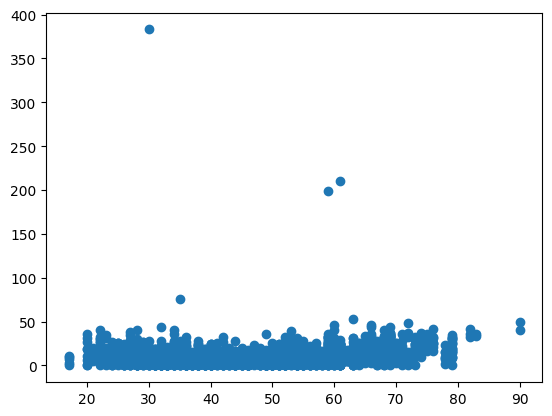

In [86]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(int(abs(predictions_age[i] - list(y_test_age['age'])[i])))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("RandomForrestAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("RandomForrestAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Random Forrest Gender
y = y_train_gender
clf = RandomForestClassifier(random_state = 0 , n_estimators=100)
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.916) total time=   6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.931) total time=   6.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   12.7s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.929) total time=   5.6s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   18.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.922) total time=   7.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   25.4s
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_gender = model.predict(X_test_scaled)
print(list(predicted_gender))
print(list(y_test_gender['gender']))
confusion_matrix = [[0, 0], [0, 0]]
l = len(predicted_gender)
for i in range(l):
  if list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'm':
    confusion_matrix[0][0] += 1
  elif list(predicted_gender)[i] == 'f' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[1][1] += 1
  elif list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[0][1] += 1
  else:
    confusion_matrix[1][0] += 1
print(confusion_matrix[0])
print(confusion_matrix[1])

['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'm',

In [ ]:
import pickle
from google.colab import files

with open("RandomForrestGender.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("RandomForrestGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression age
y = y_train_age
clf = LogisticRegression(solver='liblinear' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))


[CV] START .....................................................................
[CV] END ................................ score: (test=0.166) total time= 1.2min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.2min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.165) total time=  38.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  1.8min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.158) total time=  40.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  2.5min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.163) total time=  38.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  3.1min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

[31, 36, 54, 33, 34, 47, 44, 61, 59, 50, 29, 63, 47, 33, 28, 41, 51, 55, 41, 31, 43, 69, 36, 67, 50, 24, 38, 67, 20, 72, 54, 55, 36, 59, 32, 36, 63, 41, 40, 52, 37, 63, 32, 53, 46, 55, 54, 40, 32, 47, 32, 61, 31, 41, 55, 25, 57, 32, 50, 59, 64, 32, 54, 55, 39, 40, 46, 52, 74, 47, 49, 50, 46, 44, 49, 46, 52, 44, 22, 57, 49, 59, 63, 31, 32, 61, 49, 51, 38, 48, 18, 47, 33, 73, 23, 36, 40, 59, 57, 59, 31, 52, 44, 68, 63, 31, 51, 32, 25, 24, 51, 34, 47, 28, 38, 47, 50, 70, 25, 42, 34, 57, 46, 31, 48, 24, 47, 36, 57, 78, 54, 29, 59, 32, 31, 36, 48, 50, 61, 67, 48, 35, 38, 59, 47, 67, 63, 29, 50, 52, 41, 27, 51, 57, 50, 31, 49, 44, 31, 51, 25, 51, 51, 51, 32, 38, 54, 33, 69, 35, 38, 54, 54, 50, 44, 68, 52, 59, 43, 35, 61, 34, 66, 40, 36, 54, 78, 31, 68, 55, 31, 28, 38, 59, 36, 20, 54, 52, 38, 63, 57, 54, 52, 52, 37, 36, 49, 49, 33, 46, 51, 52, 22, 38, 38, 74, 65, 46, 28, 63, 47, 36, 50, 52, 52, 50, 33, 61, 40, 68, 63, 43, 56, 68, 51, 59, 57, 52, 38, 31, 63, 58, 51, 28, 36, 25, 38, 36, 64, 27,

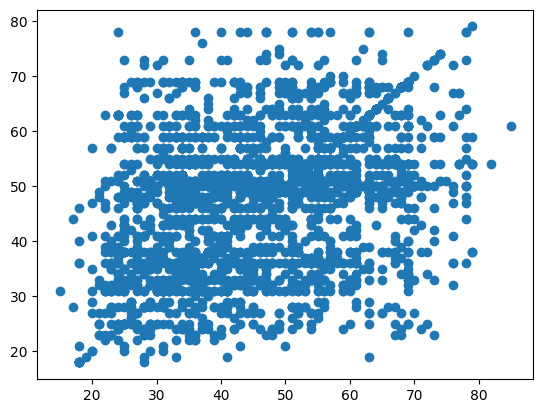

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.3501543486910926 1.4725481879356819e-74
0.3452662093429587 2.0748637738110276e-72


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

11.339467501957714
236.25176194205167
15.370483464811759


[0, 0, 13, 28, 21, 2, 25, 10, 21, 13, 9, 11, 19, 37, 0, 0, 1, 16, 26, 0, 14, 38, 21, 8, 4, 47, 2, 17, 5, 0, 3, 2, 5, 21, 14, 0, 28, 13, 2, 14, 16, 5, 10, 2, 7, 0, 0, 27, 19, 4, 6, 0, 10, 14, 9, 4, 34, 5, 9, 0, 26, 9, 0, 12, 1, 9, 19, 22, 25, 16, 17, 0, 27, 0, 5, 13, 13, 9, 11, 26, 14, 27, 12, 5, 0, 11, 8, 7, 5, 23, 0, 5, 7, 8, 13, 18, 8, 14, 11, 31, 16, 14, 1, 41, 11, 8, 22, 28, 27, 9, 12, 10, 20, 5, 4, 21, 1, 13, 1, 7, 21, 20, 10, 3, 0, 0, 13, 2, 25, 15, 19, 14, 4, 0, 2, 10, 6, 0, 29, 4, 4, 10, 0, 1, 0, 42, 0, 3, 0, 20, 13, 9, 15, 14, 10, 0, 4, 16, 1, 10, 0, 22, 18, 1, 0, 3, 23, 40, 26, 6, 17, 3, 0, 21, 7, 0, 12, 0, 0, 12, 2, 6, 0, 13, 7, 13, 15, 1, 19, 12, 16, 11, 3, 26, 0, 0, 2, 4, 9, 21, 23, 29, 0, 24, 31, 0, 4, 16, 8, 6, 6, 1, 17, 11, 7, 0, 0, 5, 5, 0, 11, 6, 18, 1, 0, 3, 2, 1, 17, 18, 39, 11, 6, 24, 0, 0, 2, 22, 17, 0, 0, 0, 9, 24, 9, 1, 2, 14, 0, 5, 19, 18, 21, 3, 7, 14, 0, 19, 0, 18, 14, 14, 27, 7, 7, 13, 9, 20, 15, 22, 13, 17, 21, 4, 3, 9, 17, 0, 0, 0, 22, 3, 9, 14, 1, 2, 12, 

-0.00030122021707741214 0.9878603763724857
-0.030002022091966712 0.12956623876567352


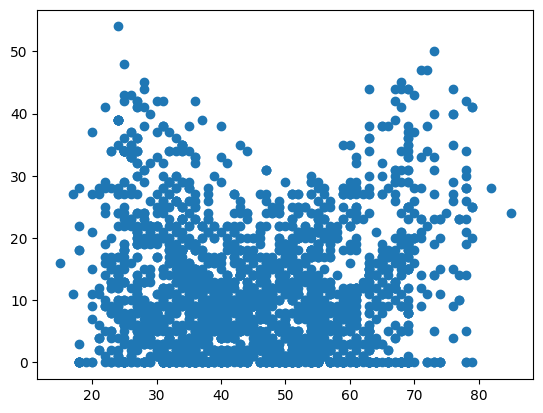

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(abs(predicted_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("LogisticRegressionAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("LogisticRegressionAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Logistic Regression gender
y = y_train_gender
clf = LogisticRegression(solver='liblinear' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.913) total time=   0.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.931) total time=   0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.6s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.923) total time=   0.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.9s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.917) total time=   0.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.2s
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_gender = model.predict(X_test_scaled)
print(list(predicted_gender))
print(list(y_test_gender['gender']))
confusion_matrix = [[0, 0], [0, 0]]
l = len(predicted_gender)
for i in range(l):
  if list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'm':
    confusion_matrix[0][0] += 1
  elif list(predicted_gender)[i] == 'f' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[1][1] += 1
  elif list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[0][1] += 1
  else:
    confusion_matrix[1][0] += 1
print(confusion_matrix[0])
print(confusion_matrix[1])

['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm',

In [ ]:
import pickle
from google.colab import files

with open("LogisticRegressionGender.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("LogisticRegressionGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVM

In [ ]:
from sklearn import svm

In [ ]:
# SVM age
y = y_train_age
clf = svm.SVC(probability=True)
model = clf.fit(X_scaled, y.values.ravel())


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose = 100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.310) total time= 1.1min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.1min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.290) total time= 1.1min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  2.1min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.287) total time= 1.1min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  3.2min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.312) total time= 1.0min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  4.2min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

[31, 36, 67, 32, 32, 45, 33, 51, 54, 39, 31, 48, 47, 36, 28, 42, 52, 39, 40, 31, 31, 47, 36, 59, 54, 24, 38, 67, 32, 72, 51, 54, 35, 33, 38, 36, 34, 57, 33, 38, 37, 44, 32, 67, 39, 55, 54, 40, 46, 51, 57, 61, 31, 49, 38, 31, 57, 47, 41, 59, 61, 35, 54, 42, 40, 31, 51, 36, 48, 63, 49, 50, 40, 44, 49, 46, 34, 46, 40, 28, 54, 32, 61, 37, 32, 31, 49, 42, 47, 48, 18, 49, 35, 37, 23, 47, 40, 59, 46, 24, 51, 50, 43, 68, 65, 31, 34, 35, 37, 24, 51, 32, 48, 40, 38, 68, 50, 43, 32, 41, 49, 57, 46, 31, 48, 24, 34, 51, 50, 35, 54, 43, 54, 32, 31, 54, 24, 50, 32, 67, 46, 25, 38, 59, 47, 55, 63, 51, 50, 51, 28, 27, 51, 43, 69, 31, 62, 69, 30, 61, 25, 32, 51, 51, 32, 46, 54, 46, 43, 35, 55, 36, 54, 50, 47, 68, 40, 59, 43, 47, 63, 52, 66, 24, 38, 50, 46, 31, 49, 67, 35, 57, 38, 27, 36, 49, 54, 52, 38, 32, 44, 25, 52, 28, 48, 36, 27, 49, 48, 40, 51, 54, 41, 38, 46, 54, 33, 51, 31, 63, 25, 36, 32, 55, 52, 46, 33, 42, 43, 54, 26, 54, 54, 61, 35, 59, 57, 34, 23, 31, 63, 55, 51, 44, 36, 32, 47, 51, 64, 28,

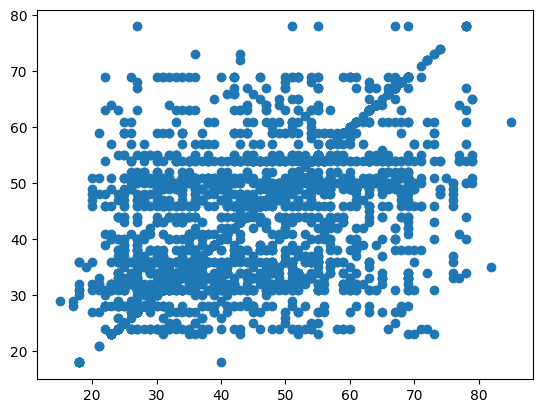

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.49071672728506704 6.910044126929323e-155
0.48943602837436045 5.7032281255495424e-154


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

8.859827721221613
176.54346123727487
13.286965840148564


[0, 0, 0, 29, 23, 0, 36, 0, 16, 2, 11, 26, 19, 34, 0, 1, 0, 0, 27, 0, 2, 16, 21, 0, 0, 47, 2, 17, 7, 0, 0, 3, 4, 5, 8, 0, 1, 29, 5, 0, 16, 24, 10, 12, 0, 0, 0, 27, 5, 0, 31, 0, 10, 6, 8, 2, 34, 10, 0, 0, 23, 6, 0, 25, 0, 0, 24, 6, 1, 0, 17, 0, 33, 0, 5, 13, 31, 11, 7, 3, 9, 0, 10, 1, 0, 19, 8, 16, 4, 23, 0, 3, 5, 28, 13, 7, 8, 14, 22, 4, 4, 16, 0, 41, 13, 8, 5, 25, 15, 9, 12, 8, 21, 17, 4, 0, 1, 14, 8, 6, 6, 20, 10, 3, 0, 0, 0, 17, 18, 28, 19, 0, 9, 0, 2, 8, 30, 0, 0, 4, 6, 0, 0, 1, 0, 30, 0, 25, 0, 19, 0, 9, 15, 0, 9, 0, 9, 9, 0, 0, 0, 3, 18, 1, 0, 11, 23, 27, 0, 6, 0, 21, 0, 21, 10, 0, 0, 0, 0, 0, 0, 24, 0, 29, 9, 17, 17, 1, 0, 0, 12, 18, 3, 6, 0, 29, 2, 4, 9, 10, 10, 0, 0, 0, 20, 0, 18, 16, 7, 0, 6, 1, 2, 11, 15, 20, 32, 0, 8, 0, 11, 6, 0, 2, 0, 1, 2, 20, 14, 4, 2, 0, 4, 17, 16, 0, 2, 4, 32, 0, 0, 3, 9, 8, 9, 8, 7, 1, 0, 6, 0, 9, 12, 7, 0, 0, 0, 0, 9, 18, 13, 18, 13, 19, 0, 1, 0, 5, 14, 5, 6, 18, 5, 0, 3, 3, 17, 0, 0, 0, 0, 0, 9, 14, 0, 2, 0, 20, 0, 13, 7, 9, 0, 18, 0, 0, 10, 9, 12,

0.1396646529216697 1.3453331492069572e-12
0.07084146455246572 0.00033983643228321025


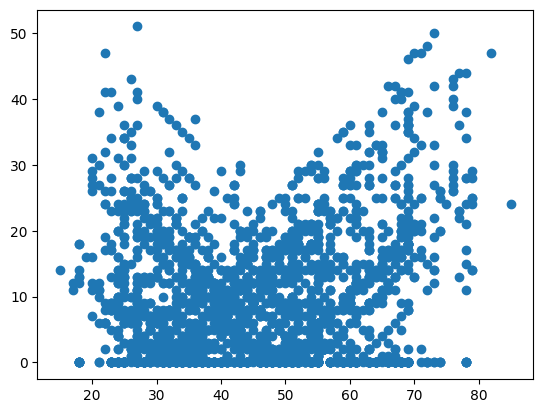

In [ ]:
age_gap = []
l = len(list(predictions_age))
for i in range(l):
  age_gap.append(abs(predicted_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)

In [ ]:
import pickle
from google.colab import files

with open("SVMAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("SVMAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# SVM gender
y = y_train_gender
clf = svm.SVC(probability=True)
model = clf.fit(X_scaled, y.values.ravel())


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose = 100)


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.925) total time=  24.8s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   24.8s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.934) total time=  11.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   36.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.939) total time=  12.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   48.9s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.928) total time=  12.6s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  1.0min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_gender = model.predict(X_test_scaled)
print(list(predicted_gender))
print(list(y_test_gender['gender']))
confusion_matrix = [[0, 0], [0, 0]]
l = len(predicted_gender)
for i in range(l):
  if list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'm':
    confusion_matrix[0][0] += 1
  elif list(predicted_gender)[i] == 'f' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[1][1] += 1
  elif list(predicted_gender)[i] == 'm' and list(y_test_gender['gender'])[i] == 'f':
    confusion_matrix[0][1] += 1
  else:
    confusion_matrix[1][0] += 1
print(confusion_matrix[0])
print(confusion_matrix[1])

['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'f', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f', 'm', 'f', 'm', 'm', 'm', 'm', 'f', 'm', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'm', 'f', 'm', 'f', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm',

In [ ]:
import pickle
from google.colab import files

with open("SVMGender.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("SVMGender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimized Random Forrest Age

In [ ]:
# Random Forrest age
y = y_train_age
clf = RandomForestClassifier(random_state = 0 , n_estimators=500)
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), verbose=100)

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.492) total time= 1.6min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.6min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.486) total time= 1.6min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  3.2min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.491) total time= 1.6min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  4.8min
[CV] START .....................................................................
[CV] END ................................ score: (test=0.509) total time= 1.5min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  6.3min
[CV] START .....................................................................
[CV] END ..................

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

[31, 36, 67, 25, 55, 45, 69, 51, 35, 28, 31, 54, 49, 65, 28, 35, 52, 39, 67, 31, 55, 47, 57, 59, 54, 48, 40, 50, 59, 72, 51, 57, 31, 46, 48, 36, 50, 44, 30, 38, 44, 68, 59, 55, 39, 55, 54, 73, 51, 48, 33, 61, 55, 49, 55, 44, 23, 28, 41, 59, 38, 66, 54, 51, 40, 18, 29, 69, 48, 63, 36, 50, 28, 44, 68, 46, 65, 46, 39, 28, 63, 32, 51, 31, 32, 63, 49, 29, 46, 37, 18, 47, 38, 65, 23, 54, 40, 59, 64, 28, 47, 44, 31, 41, 50, 31, 29, 35, 37, 24, 51, 32, 46, 23, 38, 36, 50, 69, 24, 35, 55, 39, 56, 31, 48, 24, 24, 34, 51, 63, 54, 31, 59, 32, 31, 54, 24, 50, 32, 63, 57, 35, 38, 69, 47, 55, 63, 51, 50, 33, 28, 61, 51, 43, 43, 31, 62, 32, 30, 61, 25, 35, 69, 46, 32, 41, 63, 73, 43, 41, 55, 46, 54, 63, 49, 68, 40, 59, 43, 47, 50, 59, 66, 73, 29, 50, 46, 30, 49, 67, 47, 39, 35, 27, 36, 20, 43, 44, 38, 33, 69, 25, 52, 28, 48, 36, 43, 45, 54, 40, 35, 54, 44, 27, 46, 54, 38, 54, 37, 63, 25, 49, 32, 52, 52, 46, 31, 50, 57, 26, 24, 28, 55, 61, 51, 59, 39, 34, 55, 32, 63, 58, 36, 52, 36, 24, 47, 46, 64, 34,

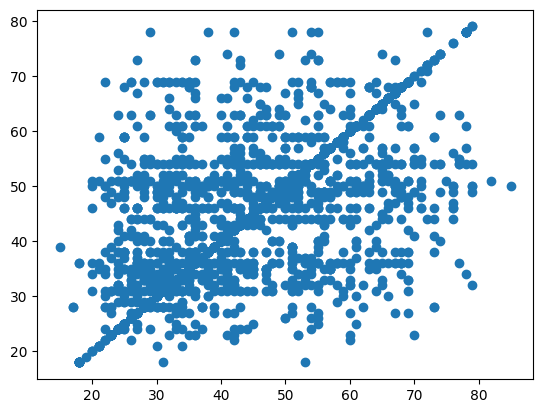

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.6366874163580984 2.149869853299097e-290
0.6386736416893857 9.231381019737161e-293


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

6.427956147220047
132.71613155833987
11.520248762867054


[0, 0, 0, 36, 0, 0, 0, 0, 3, 9, 11, 20, 21, 5, 0, 6, 0, 0, 0, 0, 26, 16, 0, 0, 0, 23, 0, 0, 34, 0, 0, 0, 0, 8, 2, 0, 15, 16, 8, 0, 9, 0, 17, 0, 0, 0, 0, 6, 0, 3, 7, 0, 14, 6, 9, 15, 0, 9, 0, 0, 0, 25, 0, 16, 0, 13, 2, 39, 1, 0, 30, 0, 45, 0, 14, 13, 0, 11, 6, 3, 0, 0, 0, 5, 0, 13, 8, 29, 3, 12, 0, 5, 2, 0, 13, 0, 8, 14, 4, 0, 0, 22, 12, 14, 2, 8, 0, 25, 15, 9, 12, 8, 19, 0, 4, 32, 1, 12, 0, 0, 0, 2, 0, 3, 0, 0, 10, 0, 19, 0, 19, 12, 4, 0, 2, 8, 30, 0, 0, 0, 5, 10, 0, 11, 0, 30, 0, 25, 0, 1, 0, 25, 15, 0, 17, 0, 9, 28, 0, 0, 0, 6, 0, 6, 0, 6, 14, 0, 0, 0, 0, 11, 0, 34, 12, 0, 0, 0, 0, 0, 13, 31, 0, 20, 0, 17, 17, 2, 0, 0, 0, 0, 0, 6, 0, 0, 13, 4, 9, 9, 35, 0, 0, 0, 20, 0, 2, 20, 13, 0, 22, 1, 5, 0, 15, 20, 27, 3, 14, 0, 11, 19, 0, 1, 0, 1, 0, 12, 0, 24, 0, 26, 5, 17, 0, 0, 16, 4, 0, 1, 0, 0, 24, 0, 9, 0, 7, 4, 0, 12, 0, 18, 16, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 7, 0, 8, 9, 6, 0, 9, 0, 18, 0, 0, 3, 0, 16, 0, 0, 0, 22, 0, 10, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 9, 6, 0, 0, 0, 0, 11, 29,

0.02508183917227416 0.20510430430712237
-0.035958468243168784 0.06922703453603546


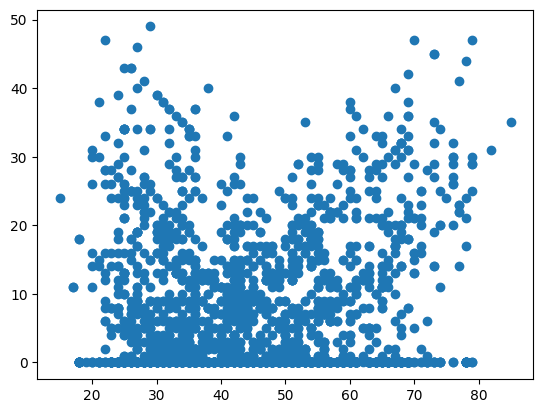

In [ ]:
age_gap = []
l = len(list(predicted_age))
for i in range(l):
  age_gap.append(abs(predicted_age[i] - list(y_test_age['age'])[i]))
print(age_gap)

display(plt.scatter(y_test_age, age_gap))

from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), age_gap)
print(rsq, p)
from scipy.stats import spearmanr
rsq, p = spearmanr(list(y_test_age['age']), age_gap)
print(rsq, p)


In [ ]:
import pickle
from google.colab import files

with open("OptRandForAge.pkl", "wb") as f:
    pickle.dump(model, f)
    files.download("OptRandForAge.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pretrained RandomForrestAge

In [ ]:
# upload the model from local files first
with open("RandomForrestAge.pkl", "rb") as f:
  model = pickle.load(f)
# 54% acc while training

In [ ]:
predicted_age = model.predict(X_test_scaled)
print(list(predicted_age))
print(list(y_test_age['age']))

l = len(list(predicted_age))
correct = 0
for i in range(l):
  if list(predicted_age)[i] == list(y_test_age['age'])[i]:
    correct += 1
print("Accuracy:", correct/l)

[31, 36, 67, 25, 55, 45, 47, 51, 31, 40, 31, 74, 49, 36, 28, 28, 52, 39, 40, 31, 28, 31, 51, 59, 54, 32, 40, 50, 59, 72, 51, 57, 31, 46, 34, 36, 36, 57, 46, 38, 61, 68, 59, 55, 39, 55, 54, 40, 51, 48, 57, 61, 55, 49, 55, 40, 23, 28, 41, 59, 38, 66, 54, 51, 40, 18, 29, 67, 48, 63, 67, 50, 28, 33, 68, 46, 68, 46, 40, 28, 63, 32, 51, 31, 32, 48, 51, 29, 54, 37, 18, 36, 38, 49, 23, 54, 40, 68, 68, 28, 47, 44, 31, 32, 50, 31, 29, 35, 37, 24, 51, 51, 27, 23, 38, 36, 50, 69, 24, 35, 55, 39, 56, 34, 48, 24, 24, 34, 51, 63, 54, 36, 49, 31, 31, 54, 25, 50, 32, 63, 38, 35, 38, 43, 47, 55, 63, 59, 50, 51, 28, 61, 51, 43, 43, 31, 62, 32, 30, 61, 25, 34, 69, 52, 32, 38, 63, 38, 21, 41, 55, 46, 54, 63, 49, 68, 40, 59, 43, 47, 54, 44, 66, 24, 29, 47, 46, 30, 49, 67, 47, 39, 35, 27, 36, 34, 54, 44, 38, 33, 69, 25, 52, 28, 48, 36, 50, 45, 54, 46, 35, 54, 44, 27, 31, 54, 42, 51, 34, 63, 25, 51, 32, 52, 52, 36, 31, 33, 57, 26, 24, 28, 54, 33, 51, 59, 39, 34, 55, 30, 63, 58, 60, 52, 36, 24, 51, 46, 64, 28,

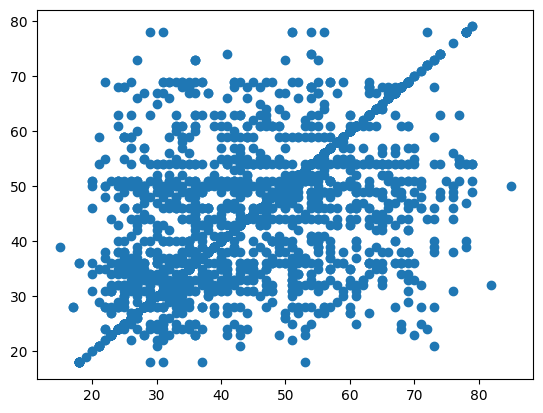

In [ ]:
display(plt.scatter(list(y_test_age['age']), predicted_age))

In [ ]:
from scipy.stats import pearsonr
rsq, p = pearsonr(list(y_test_age['age']), predicted_age)
print(rsq, p)

0.5966710371453524 3.5215413925338407e-246


In [ ]:
from sklearn import metrics
# MAE
print(metrics.mean_absolute_error(list(y_test_age['age']), predicted_age))
# MSE
print(metrics.mean_squared_error(list(y_test_age['age']), predicted_age))
# RMSE
print(np.sqrt(metrics.mean_squared_error(list(y_test_age['age']), predicted_age)))

6.956538762725137
147.87509788566953
12.16039053179089
